In [1]:
!pip install umap-learn -q
# !pip install umap-learn[plot] -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 773.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [3]:
!gdown --fuzzy https://drive.google.com/file/d/1CQgnLkSVKEPpm9NPLW03scyQy8aRp0qe/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1mBD0zUCuYHtWsRcp6wkWiP76qpCeQkYY/view?usp=sharing!gdown
!gdown --fuzzy https://drive.google.com/file/d/17D7MuSJpVjYBafeeFYaDw-a6Mk5Laa7B/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1O_2vgPYdYzJrobKahyiReaepFi1kbhvY/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1uq3_eOzI7xN5mYE8EEsC4-jnrIZfBEig/view?usp=sharing
!gdown --fuzzy  https://drive.google.com/file/d/1LXStpb_gN4xfPYu0YG4eBSZiENz4DPrV/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1pITo9Bs4OLLGpYkomjvX4-R7gHPhfGkr/view?usp=sharing

# label = pd.read_csv("./PMDA2023_Labels.csv", sep=',')
# phenoData = pd.read_csv("./2022-02-18-TeraTox-commercial-phenoData.txt", sep='\t')
# phenoData
# pScoreData = pd.read_csv("./2022-02-18-TeraTox-commercial-pScore.gct", sep='\t',skiprows=2)
# logFCdata = pd.read_csv("./2022-02-18-TeraTox-commercial-logFC.gct", sep='\t',skiprows=2)

Downloading...
From: https://drive.google.com/uc?id=1CQgnLkSVKEPpm9NPLW03scyQy8aRp0qe
To: /content/2022-02-18-TeraTox-commercial-logFC.gct
100% 4.88M/4.88M [00:00<00:00, 180MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mBD0zUCuYHtWsRcp6wkWiP76qpCeQkYY
To: /content/2022-02-18-TeraTox-commercial-pScore.gct
100% 4.70M/4.70M [00:00<00:00, 220MB/s]
Downloading...
From: https://drive.google.com/uc?id=17D7MuSJpVjYBafeeFYaDw-a6Mk5Laa7B
To: /content/2022-02-18-TeraTox-commercial-featureData.txt
100% 72.8k/72.8k [00:00<00:00, 4.24MB/s]
Downloading...
From: https://drive.google.com/uc?id=1O_2vgPYdYzJrobKahyiReaepFi1kbhvY
To: /content/2022-02-18-TeraTox-commercial-phenoData.txt
100% 21.4k/21.4k [00:00<00:00, 42.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1uq3_eOzI7xN5mYE8EEsC4-jnrIZfBEig
To: /content/2021-06-10-gcGeneFactorAnno-withPositiveCoefs.tsv
100% 6.98k/6.98k [00:00<00:00, 16.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LXStpb_gN4xfPYu0YG4eBSZiENz4

In [34]:
phenoData = pd.read_csv("./2022-02-18-TeraTox-commercial-phenoData.txt", sep='\t')
phenoData = phenoData.rename(columns={"Unnamed: 0":"index"})
phenoData

,index,Contrast,Compound_Name,Concentration,ConcLabel,Viability,Cytotoxicity,Teratogenicity,mEST
0,Amoxicillin_DoseA,Amoxycillin_DoseA,Amoxycillin,0.000200,6,0.905376,0.094624,Negative,Negative
1,Amoxicillin_DoseB,Amoxycillin_DoseB,Amoxycillin,0.000100,5,0.977817,0.022183,Negative,Negative
2,Amoxicillin_DoseC,Amoxycillin_DoseC,Amoxycillin,0.000050,4,0.912548,0.087452,Negative,Negative
3,Amoxicillin_DoseD,Amoxycillin_DoseD,Amoxycillin,0.000025,3,0.906648,0.093352,Negative,Negative
4,Amoxicillin_DoseE,Amoxycillin_DoseE,Amoxycillin,0.000013,2,0.975004,0.024996,Negative,Negative
...,...,...,...,...,...,...,...,...,...
211,SD_Warfarin_2,SD_Warfarin_2,Warfarin,0.000004,2,1.062431,-0.062431,Positive,Negative
212,SD_Warfarin_3,SD_Warfarin_3,Warfarin,0.000008,3,0.944358,0.055642,Positive,Negative
213,SD_Warfarin_4,SD_Warfarin_4,Warfarin,0.000015,4,0.914429,0.085571,Positive,Negative
214,SD_Warfarin_5,SD_Warfarin_5,Warfarin,0.000030,5,1.010029,-0.010029,Positive,Negative


In [33]:
logFCdata = pd.read_csv("./2022-02-18-TeraTox-commercial-logFC.gct", sep='\t',skiprows=2)
logFCdata = logFCdata.T
logFCdata.columns = logFCdata.iloc[0]
logFCdata.reset_index(inplace=True)
logFCdata = logFCdata.iloc [2:, :]
logFCdata

NAME,index,SULT1C2,CYP1B1,RARB,TREX1,HOPX,IFIT1,HEY1,ARNTL,REL,...,TRAF6,SEL1L,CD83,CCND2,HYOU1,TRPM8,SCN4A,CYP7B1,GSTP1,ACACA
2,Amoxicillin_DoseA,-0.970659,0.404713,0.708086,0.40742,0.51051,-1.175466,0.507317,-1.466817,-0.345051,...,0.00143,-0.001855,-0.002504,0.000798,-0.000561,-0.001287,0.000696,0.000292,-0.000044,-0.000002
3,Amoxicillin_DoseB,-1.250559,0.378487,0.567036,0.058359,0.428856,-0.575646,0.385722,-1.686624,-0.468903,...,-0.136413,-0.081366,-0.061153,0.016983,0.046186,-0.020869,-0.065711,-0.039486,-0.05182,-0.044478
4,Amoxicillin_DoseC,-1.180246,0.502313,0.751129,0.211459,0.500339,-0.173032,0.567856,-1.758296,-0.423818,...,-0.111911,-0.037774,-0.049183,0.045766,0.03874,-0.055937,-0.093213,0.074189,-0.058804,-0.015895
5,Amoxicillin_DoseD,-0.674401,0.607649,0.761506,0.075904,0.693091,-0.284532,0.468771,-1.108447,-0.337362,...,0.028868,0.038729,-0.102751,-0.011079,0.008416,-0.147931,-0.060794,-0.071225,-0.098383,-0.007753
6,Amoxicillin_DoseE,-2.058376,0.386781,0.306633,0.176817,0.30711,-0.351318,0.123299,-2.972723,-0.634738,...,-0.186171,-0.156696,-0.235592,0.02619,0.05508,0.077691,-0.010079,-0.123419,-0.055052,0.020699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,SD_Warfarin_2,-1.156578,0.588825,0.765045,-0.433606,-0.259199,-0.264449,0.563434,-1.143923,-0.293138,...,-0.55228,-0.405498,0.097835,0.074854,0.073023,-0.028404,-0.178161,-0.341955,0.019413,-0.02035
214,SD_Warfarin_3,-1.415139,0.567426,0.823062,-0.613697,-0.142938,-0.229361,0.227762,-1.658923,-0.351973,...,-0.767889,-0.682554,0.192731,0.012716,0.033007,0.0241,-0.235197,-0.228209,0.077611,0.102106
215,SD_Warfarin_4,-0.161205,0.264776,0.837533,-0.244254,-0.372838,-0.171232,0.278841,0.148505,0.081464,...,-0.067691,-0.070197,-0.108719,0.011796,-0.031651,-0.138062,-0.068604,-0.000902,-0.268441,-0.04925
216,SD_Warfarin_5,-1.724154,0.778578,0.487605,-0.214184,0.295399,0.212693,0.225371,-2.135785,-0.592019,...,-0.882279,-0.72702,0.402763,-0.068133,0.062992,-0.125407,-0.145415,-0.239031,-0.030693,0.016898


In [38]:
logFCdataMerged = pd.merge(logFCdata, phenoData, on = 'index')
logFCdataMerged

,index,SULT1C2,CYP1B1,RARB,TREX1,HOPX,IFIT1,HEY1,ARNTL,REL,...,GSTP1,ACACA,Contrast,Compound_Name,Concentration,ConcLabel,Viability,Cytotoxicity,Teratogenicity,mEST
0,Amoxicillin_DoseA,-0.970659,0.404713,0.708086,0.40742,0.51051,-1.175466,0.507317,-1.466817,-0.345051,...,-0.000044,-0.000002,Amoxycillin_DoseA,Amoxycillin,0.000200,6,0.905376,0.094624,Negative,Negative
1,Amoxicillin_DoseB,-1.250559,0.378487,0.567036,0.058359,0.428856,-0.575646,0.385722,-1.686624,-0.468903,...,-0.05182,-0.044478,Amoxycillin_DoseB,Amoxycillin,0.000100,5,0.977817,0.022183,Negative,Negative
2,Amoxicillin_DoseC,-1.180246,0.502313,0.751129,0.211459,0.500339,-0.173032,0.567856,-1.758296,-0.423818,...,-0.058804,-0.015895,Amoxycillin_DoseC,Amoxycillin,0.000050,4,0.912548,0.087452,Negative,Negative
3,Amoxicillin_DoseD,-0.674401,0.607649,0.761506,0.075904,0.693091,-0.284532,0.468771,-1.108447,-0.337362,...,-0.098383,-0.007753,Amoxycillin_DoseD,Amoxycillin,0.000025,3,0.906648,0.093352,Negative,Negative
4,Amoxicillin_DoseE,-2.058376,0.386781,0.306633,0.176817,0.30711,-0.351318,0.123299,-2.972723,-0.634738,...,-0.055052,0.020699,Amoxycillin_DoseE,Amoxycillin,0.000013,2,0.975004,0.024996,Negative,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,SD_Warfarin_2,-1.156578,0.588825,0.765045,-0.433606,-0.259199,-0.264449,0.563434,-1.143923,-0.293138,...,0.019413,-0.02035,SD_Warfarin_2,Warfarin,0.000004,2,1.062431,-0.062431,Positive,Negative
212,SD_Warfarin_3,-1.415139,0.567426,0.823062,-0.613697,-0.142938,-0.229361,0.227762,-1.658923,-0.351973,...,0.077611,0.102106,SD_Warfarin_3,Warfarin,0.000008,3,0.944358,0.055642,Positive,Negative
213,SD_Warfarin_4,-0.161205,0.264776,0.837533,-0.244254,-0.372838,-0.171232,0.278841,0.148505,0.081464,...,-0.268441,-0.04925,SD_Warfarin_4,Warfarin,0.000015,4,0.914429,0.085571,Positive,Negative
214,SD_Warfarin_5,-1.724154,0.778578,0.487605,-0.214184,0.295399,0.212693,0.225371,-2.135785,-0.592019,...,-0.030693,0.016898,SD_Warfarin_5,Warfarin,0.000030,5,1.010029,-0.010029,Positive,Negative


In [43]:
logFCdata_plain = logFCdataMerged.iloc[:, 1:1216]
logFCdata_plain

,SULT1C2,CYP1B1,RARB,TREX1,HOPX,IFIT1,HEY1,ARNTL,REL,TEAD1,...,TRAF6,SEL1L,CD83,CCND2,HYOU1,TRPM8,SCN4A,CYP7B1,GSTP1,ACACA
0,-0.970659,0.404713,0.708086,0.40742,0.51051,-1.175466,0.507317,-1.466817,-0.345051,-1.633118,...,0.00143,-0.001855,-0.002504,0.000798,-0.000561,-0.001287,0.000696,0.000292,-0.000044,-0.000002
1,-1.250559,0.378487,0.567036,0.058359,0.428856,-0.575646,0.385722,-1.686624,-0.468903,-2.538061,...,-0.136413,-0.081366,-0.061153,0.016983,0.046186,-0.020869,-0.065711,-0.039486,-0.05182,-0.044478
2,-1.180246,0.502313,0.751129,0.211459,0.500339,-0.173032,0.567856,-1.758296,-0.423818,-2.02851,...,-0.111911,-0.037774,-0.049183,0.045766,0.03874,-0.055937,-0.093213,0.074189,-0.058804,-0.015895
3,-0.674401,0.607649,0.761506,0.075904,0.693091,-0.284532,0.468771,-1.108447,-0.337362,-1.166005,...,0.028868,0.038729,-0.102751,-0.011079,0.008416,-0.147931,-0.060794,-0.071225,-0.098383,-0.007753
4,-2.058376,0.386781,0.306633,0.176817,0.30711,-0.351318,0.123299,-2.972723,-0.634738,-2.659471,...,-0.186171,-0.156696,-0.235592,0.02619,0.05508,0.077691,-0.010079,-0.123419,-0.055052,0.020699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,-1.156578,0.588825,0.765045,-0.433606,-0.259199,-0.264449,0.563434,-1.143923,-0.293138,-0.966323,...,-0.55228,-0.405498,0.097835,0.074854,0.073023,-0.028404,-0.178161,-0.341955,0.019413,-0.02035
212,-1.415139,0.567426,0.823062,-0.613697,-0.142938,-0.229361,0.227762,-1.658923,-0.351973,-2.108421,...,-0.767889,-0.682554,0.192731,0.012716,0.033007,0.0241,-0.235197,-0.228209,0.077611,0.102106
213,-0.161205,0.264776,0.837533,-0.244254,-0.372838,-0.171232,0.278841,0.148505,0.081464,-0.34892,...,-0.067691,-0.070197,-0.108719,0.011796,-0.031651,-0.138062,-0.068604,-0.000902,-0.268441,-0.04925
214,-1.724154,0.778578,0.487605,-0.214184,0.295399,0.212693,0.225371,-2.135785,-0.592019,-2.469056,...,-0.882279,-0.72702,0.402763,-0.068133,0.062992,-0.125407,-0.145415,-0.239031,-0.030693,0.016898


Text(0.5, 1.0, 'UMAP of human logFC data')

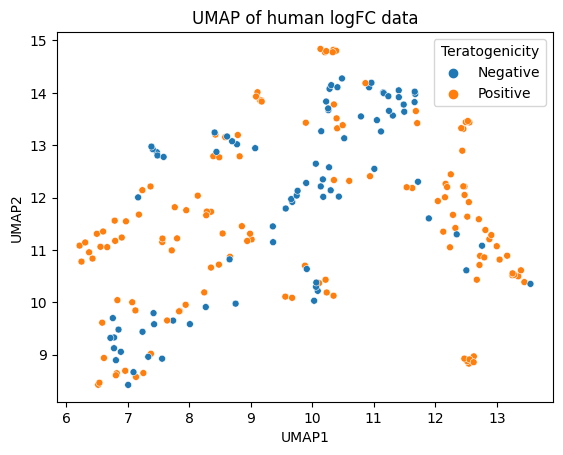

In [47]:
logFCdata_plain_nor = StandardScaler().fit_transform(logFCdata_plain)
logFCdata_plain_nor

emedding = umap.UMAP(random_state=42).fit_transform(logFCdata_plain_nor)

emedding.shape

ax = sns.scatterplot(x=emedding[:, 0], y=emedding[:, 1], s = 25, hue = logFCdataMerged["Teratogenicity"])
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.setp(ax.get_legend().get_texts(), fontsize='10') # for legend text
#plt.setp(ax.get_legend().get_title(), fontsize='10') # for legend title
# Set x-axis label
plt.xlabel('UMAP1')
# Set y-axis label
plt.ylabel('UMAP2')
plt.title('UMAP of human logFC data')

Text(0.5, 1.0, 'pca on logFC data')

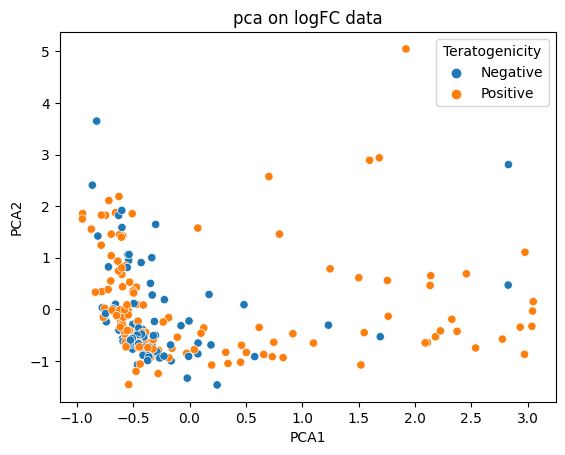

In [61]:
pca = PCA(n_components=2, whiten=True)
pcs = pca.fit_transform(logFCdata_plain_nor)

#plt.figure()
ax = sns.scatterplot (x = pcs[:, 0], y = pcs[:, 1],hue = logFCdataMerged ["Teratogenicity"] )
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title("pca on logFC data")